<a href="https://colab.research.google.com/github/AldoEHF14/SciKitLearn-Machine-Learning/blob/main/Training_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos para entrenar | Training Data Set
## ¿Que es un conjunto de entrenamiento en Sciki-learn?

En Scikit-learn, un conjunto de entrenamiento es un subconjunto de datos utilizado para entrenar un modelo de aprendizaje automático. Este conjunto se usa para que el modelo aprenda los patrones y relaciones en los datos, permitiéndole hacer predicciones precisas en datos nuevos.

<b>¿Cómo utilizar Sklearn para separar tus datos, en el conjunto que servirá para entrenar el modelo, y el conjunto para probarlo? Aquí se muestra cómo hacerlo a partir de datos de películas de kaggle.</b>

Ejemplo: Tenemos el archivo moviesc10.csv el cual tenemos 10 datos, para esta pequeña pureba en donde tomamo el 30% de esto datos como entrenamiento y el otro 70% para prueba. Esto con la finalidad de que el modelo haga predicciones con  datos que jamas haya visto y tambien no muestra la metricas para identificar el marge de error del modelo.

Pagina de Sciki-learning:
[Sciki-learn](https://scikit-learn.org/stable/)

Conjunto de base de datos en kaggle:
[Dataset](https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data/data)

Dataset para prueba: moviesc10.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split # Dividir el conjunto
from sklearn import linear_model # Modelo de regresión lineal.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [ ]:
#Leer archivo desde el escritorio (Google Colab)
from google.colab import files
uploaded = files.upload()

Saving moviesc10.csv to moviesc10 (4).csv


In [ ]:
# Leer los datos
datos = pd.read_csv('moviesc10.csv')
df = pd.DataFrame(datos)

# Variable independiente
x = df["cast_total_facebook_likes"].values.reshape(-1, 1)  # matriz 2D
# Variable dependiente
y = df["imdb_score"].values

# Separar en entrenamiento y prueba
# Muestra de prueba (test_size), los mismo datos(random_state)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=42)

# Mostrar los datos
print("Datos originales")
print(df)

print("X_train")
print(X_train)

print("y_train")
print(y_train)

#Espera una matriz
# X_train =X_train.values.reshape([X_train.values.shape[0],1])
# X_test =X_test.values.reshape([X_test.values.shape[0],1])


Datos originales
   cast_total_facebook_likes  imdb_score
0                     108016         5.4
1                     303717         5.2
2                     656730         7.2
3                     137712         5.7
4                     120797         6.0
5                     140268         6.0
6                     170118         6.4
7                     261818         9.1
8                     263584         5.6
9                     283939         3.9
X_train
[[120797]
 [137712]
 [170118]]
y_train
[6.  5.7 6.4]


In [ ]:
# Entrenar el modelo de regresión lineal
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

# Prediciones con el modelo
y_pred = regr.predict(X_test)


# Mostrar métricas
print("Error absoluto medio:", mean_absolute_error(y_test, y_pred))
print("Coeficiente R²:", r2_score(y_test, y_pred))

Error absoluto medio: 1.956395178842264
Coeficiente R²: -1.413554238248346


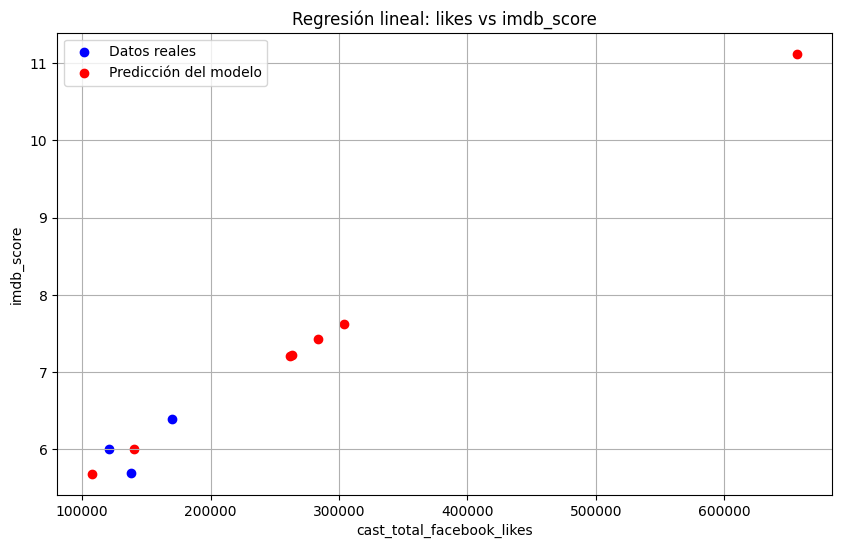

In [ ]:
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label="Datos reales",)
plt.scatter(X_test, y_pred, color='red', label="Predicción del modelo")
plt.xlabel("cast_total_facebook_likes")
plt.ylabel("imdb_score")
plt.title("Regresión lineal: likes vs imdb_score")
plt.legend()
plt.grid(True)
plt.show()
